### Simulating Layer Sequences with Specific Sparsity Architectures

This setup now uses a two-script process to simulate sequences of layers, allowing different hardware sparsity architectures to be applied to each layer, mimicking architectures like NeuronCore.

**1. Configure the Simulation (`scripts/configure_run.py`)**

This script generates a configuration file (`.yaml`) that defines the sequence of layers to simulate, their corresponding workload shapes, and the specific hardware architecture file to use for each.

**Usage:**

```bash
# Example: Configure a 3-layer run with mixed architectures
python scripts/configure_run.py \
  --model-name "resnet50_3layer_2x4_unstruct_ideal" \
  --output-yaml "generated_configs/resnet50_3layer_2x4_unstruct_ideal.yaml" \
  --layer "resnet50_conv1:structured_2_4_sparse_tensor_core.yaml" \
  --layer "resnet50_conv2_block1_1:unstructured_sparse_tensor_core.yaml" \
  --layer "resnet50_conv2_block1_2:ideal_sparse_tensor_core.yaml"
```

**Arguments:**

*   `--model-name`: A descriptive name for this entire simulation run (e.g., `resnet50_3layer_2x4_unstruct_ideal`). This determines the main output directory name.
*   `--output-yaml`: The path where the generated configuration file will be saved (e.g., `generated_configs/resnet50_3layer_2x4_unstruct_ideal.yaml`).
*   `--layer LAYER_NAME:ARCH_FILE.yaml`: Specifies one layer to include in the sequence. Use this argument multiple times for multiple layers.
    *   `LAYER_NAME`: The name of the layer (e.g., `resnet50_conv1`). This name **must** exist as a key in the `LAYER_WORKLOAD_MAP` dictionary inside `scripts/configure_run.py`. The script uses this map to find the correct workload shape file (e.g., `resnet/resnet50_conv1_2x4.yaml`).
    *   `ARCH_FILE.yaml`: The filename of the architecture file from the `arch/` directory to use for simulating this layer (e.g., `structured_2_4_sparse_tensor_core.yaml`, `unstructured_sparse_tensor_core.yaml`). Ensure this file exists.

*Important:* Before running, you **must** update the `LAYER_WORKLOAD_MAP` dictionary within `scripts/configure_run.py` to include mappings for all the layer names you intend to use and ensure they point to the correct, existing workload files (e.g., `resnet/resnet50_conv1_2x4.yaml`, `resnet/resnet50_conv2_block1_1_2x4.yaml`). You may need to generate these workload files if they don't exist for the desired layers/structures.

**2. Run the Simulation Sweep (`scripts/sweep_dynamic.py`)**

This script reads the configuration file generated in Step 1 and runs Timeloop for each layer defined within it, using the specified workload and architecture file for that layer.

**Usage:**

```bash
# Example: Run the sweep defined in the generated config file
python scripts/sweep_dynamic.py generated_configs/resnet50_3layer_2x4_unstruct_ideal.yaml
```

**Argument:**

*   `<sequence_yaml_path>`: The path to the configuration file generated by `configure_run.py` (e.g., `generated_configs/resnet50_3layer_2x4_unstruct_ideal.yaml`).

**Output:**

The script will create an output directory structure like `outputs/<model_name>/<layer_name>/`, where `<model_name>` comes from the `--model-name` used in Step 1, and `<layer_name>` is the name specified in the `--layer` argument during configuration (e.g., `outputs/resnet50_3layer_2x4_unstruct_ideal/resnet50_conv1/`). Each layer subdirectory will contain the standard Timeloop output files (`timeloop-mapper.stats.txt`, etc.) for that layer simulated with its specified architecture.

**(Optional Step 3. Parsing Results)**

Use `scripts/parse_plot_dynamic.py` to parse the results from the output directory generated by the sweep script (see separate instructions or run the script with `-h` for help).

In [28]:
%%bash
cd "/home/workspace/2022.micro.artifact/evaluation_setups/unstructured_sparse_eval"
mkdir -p generated_configs #directory for generated YAMLs
        
python scripts/configure_run.py \
  --model-name "resnet50_3layer_all_2x4_on_2x4arch" \
  --output-yaml "generated_configs/resnet50_3layer_all_2x4_on_2x4arch.yaml" \
  --layer "resnet50_conv1:structured_2_4_sparse_tensor_core.yaml" \
  --layer "resnet50_conv2_block1_1:structured_2_4_sparse_tensor_core.yaml" \
  --layer "resnet50_conv2_block1_2:structured_2_4_sparse_tensor_core.yaml" 

Generating sequence YAML for model: resnet50_3layer_all_2x4_on_2x4arch
Output file will be: /home/workspace/2022.micro.artifact/evaluation_setups/unstructured_sparse_eval/generated_configs/resnet50_3layer_all_2x4_on_2x4arch.yaml
  + Added layer: resnet50_conv1 (Workload: resnet/resnet50_conv1_2x4.yaml, Arch: structured_2_4_sparse_tensor_core.yaml)
  + Added layer: resnet50_conv2_block1_1 (Workload: resnet/resnet50_conv2_block1_1_2x4.yaml, Arch: structured_2_4_sparse_tensor_core.yaml)
  + Added layer: resnet50_conv2_block1_2 (Workload: resnet/resnet50_conv2_block1_2_2x4.yaml, Arch: structured_2_4_sparse_tensor_core.yaml)

Successfully generated sequence YAML: /home/workspace/2022.micro.artifact/evaluation_setups/unstructured_sparse_eval/generated_configs/resnet50_3layer_all_2x4_on_2x4arch.yaml


In [29]:
%%bash
cd ../evaluation_setups/unstructured_sparse_eval
python scripts/sweep_dynamic.py generated_configs/resnet50_3layer_all_2x4_on_2x4arch.yaml

BASE_DIR: /home/workspace/2022.micro.artifact/evaluation_setups/unstructured_sparse_eval
Common configuration files and sequence file checked.
Loaded sequence for model: resnet50_3layer_all_2x4_on_2x4arch
Found 3 layers to process.
------------------------------------------------------------
Running Timeloop for Layer: resnet50_conv1
  Workload: workload/resnet/resnet50_conv1_2x4.yaml
  Arch:     arch/structured_2_4_sparse_tensor_core.yaml
  Output:   outputs/resnet50_3layer_all_2x4_on_2x4arch/resnet50_conv1
Executing: timeloop-mapper /home/workspace/2022.micro.artifact/evaluation_setups/unstructured_sparse_eval/arch/structured_2_4_sparse_tensor_core.yaml /home/workspace/2022.micro.artifact/evaluation_setups/unstructured_sparse_eval/dataflow/weight_stationary.yaml /home/workspace/2022.micro.artifact/evaluation_setups/unstructured_sparse_eval/sparse-opt/dynamic_sparsity_opt.yaml /home/workspace/2022.micro.artifact/evaluation_setups/unstructured_sparse_eval/workload/resnet/resnet50_conv1

In [42]:
%%bash
cd "/home/workspace/2022.micro.artifact/evaluation_setups/unstructured_sparse_eval"
python scripts/parse_plot_dynamic.py outputs/resnet50_3layer_all_2x4_on_2x4arch --sequence_file generated_configs/resnet50_3layer_all_2x4_on_2x4arch.yaml

Parsing results for model: resnet50_3layer_all_2x4_on_2x4arch from /home/workspace/2022.micro.artifact/evaluation_setups/unstructured_sparse_eval/outputs/resnet50_3layer_all_2x4_on_2x4arch
Loaded architecture info from /home/workspace/2022.micro.artifact/evaluation_setups/unstructured_sparse_eval/generated_configs/resnet50_3layer_all_2x4_on_2x4arch.yaml
Found 3 potential layer directories.

Parsed 3 layer results.
                     Layer                           Sparsity Arch Sparsity Type    Cycles   Energy (pJ)  Utilization (%)                                                          Output Dir
0           resnet50_conv1  structured_2_4_sparse_tensor_core.yaml           2:4  39337984  1.114970e+09              1.0           outputs/resnet50_3layer_all_2x4_on_2x4arch/resnet50_conv1
1  resnet50_conv2_block1_1  structured_2_4_sparse_tensor_core.yaml           2:4    100352  4.528000e+07             50.0  outputs/resnet50_3layer_all_2x4_on_2x4arch/resnet50_conv2_block1_1
2  resnet50_

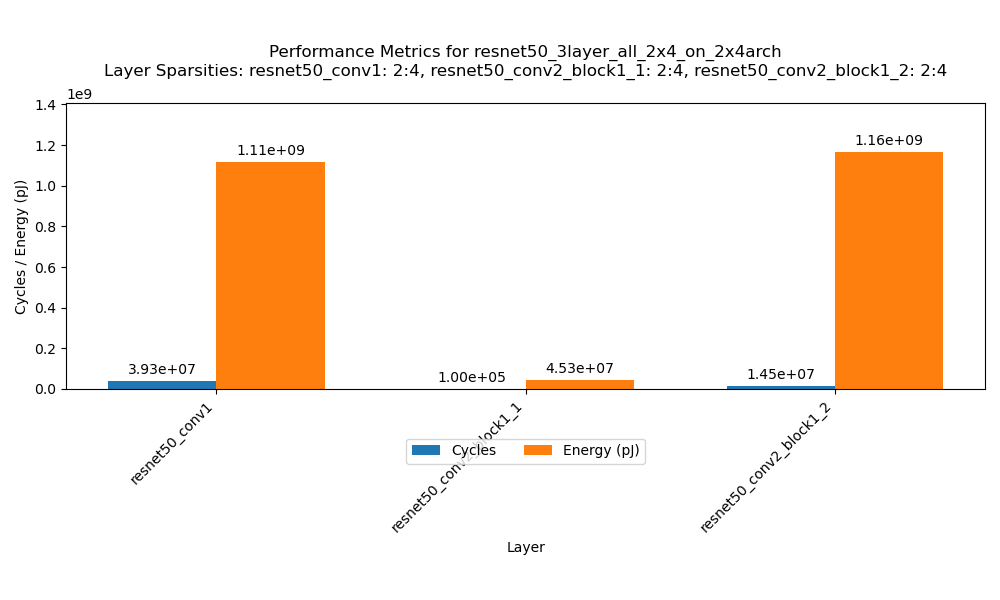

In [43]:
from IPython.display import Image, display
import matplotlib.pyplot as plt

figure = "../evaluation_setups/unstructured_sparse_eval/figures/resnet50_3layer_all_2x4_on_2x4arch_combined_cycles_energy_per_layer.png"

display(Image(filename=figure))